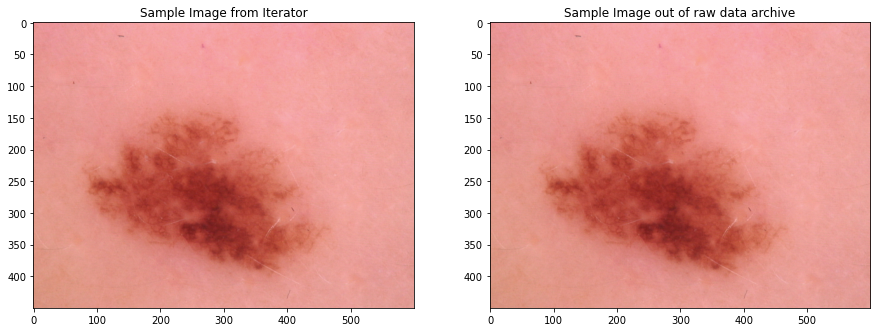

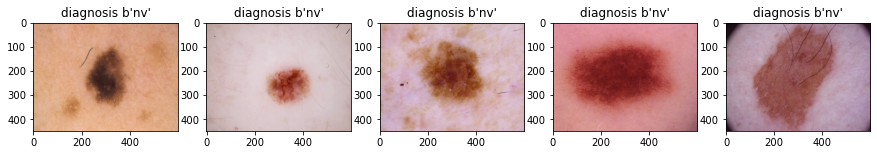

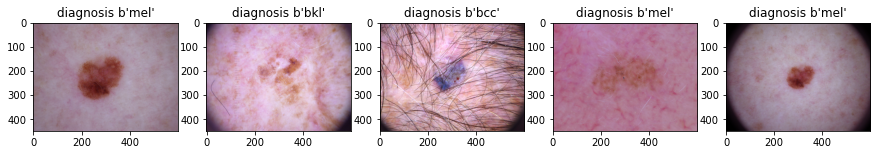

In [11]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from src.outlier_hub.datasets.ham10k.factory import HAMFactory
from data_stack.io.storage_connectors import StorageConnector, FileStorageConnector
import os
import random

# create an iterator
data_root = os.getcwd()
data_storage_path = os.path.join(data_root, "data")
storage_connector = FileStorageConnector(root_path=data_storage_path)
ham_factory = HAMFactory(storage_connector)
ham_iterator, _ = ham_factory.get_dataset_iterator(config={"split": "raw"})

# choose a random image example from the iterator
random_int = random.randint(0,ham_iterator.__len__())
iterator_image = ham_iterator[random_int][0]

# get filename out of metadata from example itself - bytetype
iterator_image_name = ham_iterator[random_int][1][1]

# prepare path for archive image
raw_data_storage_path = os.path.join(data_storage_path, "raw")
raw_img_data_storage_path = os.path.join(raw_data_storage_path, "images")
iterator_image_name = str(iterator_image_name)[2:14] + '.jpg'
archive_image_path = os.path.join(raw_img_data_storage_path, iterator_image_name)

# get image out of archive
archive_image = mpimg.imread(archive_image_path)

# plot images side by side for comparison
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2,1)
plt.title('Sample Image from Iterator')
plt.imshow(iterator_image)

f.add_subplot(1,2, 2)
plt.title('Sample Image out of raw data archive')
plt.imshow(archive_image)
plt.show()

# create a list of randomly selected samples with nv diagnosis and not nv diagnosis
nv_img_list = []
not_nv_img_list = []

while(len(nv_img_list)!=5):
    random_int = random.randint(0,ham_iterator.__len__())

    if (str(ham_iterator[random_int][1][2])[2:4] == 'nv'):
        nv_img_list.append((ham_iterator[random_int][0],
                           str(ham_iterator[random_int][1][2])))

while(len(not_nv_img_list)!=5):
    random_int = random.randint(0,ham_iterator.__len__())

    if (str(ham_iterator[random_int][1][2])[2:4] != 'nv'):
        not_nv_img_list.append((ham_iterator[random_int][0],
                               str(ham_iterator[random_int][1][2])))

f = plt.figure(figsize=(15, 15))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    f.add_subplot(rows, columns, i)
    plt.title(f'diagnosis {nv_img_list[i-1][1]}')
    plt.imshow(nv_img_list[i-1][0])
plt.show()

f = plt.figure(figsize=(15, 15))

for i in range(1, columns*rows +1):
    f.add_subplot(rows, columns, i)
    plt.title(f'diagnosis {not_nv_img_list[i-1][1]}')
    plt.imshow(not_nv_img_list[i-1][0])
plt.show()


